# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet, stopwords
import joblib

In [2]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# PREPARING DATA(Dataset 1)

## Loading Data

In [3]:
dataset = pd.read_csv('../cleaned_data.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
1,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
2,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
3,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
4,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
...,...,...,...,...,...,...,...,...
17557,2011,White as Snow,Turkish,Selim Güneş,"Hakan Korkmaz, Sinem İslamoğlu & Gürkan Piri O...",drama,https://en.wikipedia.org/wiki/White_as_Snow_(f...,Hasan is a twelve-year-old boy living with his...
17558,2011,Once Upon a Time in Anatolia,Turkish,Nuri Bilge Ceylan,"Yılmaz Erdoğan, Taner Birsel & Ufuk Karaali",drama,https://en.wikipedia.org/wiki/Once_Upon_a_Time...,"Through the night, three cars carry a small gr..."
17559,2013,Selam,Turkish,Levent Demirkale,"Bucin Abdullah, Selma Alispahic, Tina Cvitanov...",drama,https://en.wikipedia.org/wiki/Selam_(film),The film opens with a Senegalese boy named Kha...
17560,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."


In [4]:
x = dataset['Plot'].copy()
y1 = dataset['Genre'].copy()

## Visualizing different classes

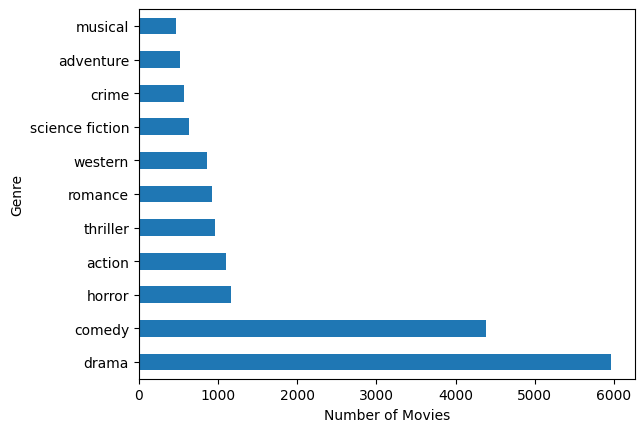

In [5]:
y1.value_counts().plot(kind='barh')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

In [28]:
unique_values = list(y1.unique())
mapping = {value: index for index, value in enumerate(unique_values)}
y2 = [mapping[string] for string in y1]
mapping = {index: value for value, index in mapping.items()}

## Removing Stopwords

In [7]:
stop_words = set(stopwords.words('english'))

for i in range (0, len(x)):
    plot = word_tokenize(x[i])
    filtered_plot = [word for word in plot if not word in stop_words]
    x[i] = ' '.join(filtered_plot)

## Train Test Split

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y2, test_size=0.15, shuffle=True, stratify=y2, random_state=1)

In [31]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)

## Word2Vec Conversion

In [5]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else: 
        return wordnet.NOUN

In [6]:
class LemmTokenizer:
    def __init__(self) -> None:
        self.wnl = WordNetLemmatizer()
    
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [34]:
vectorizer = TfidfVectorizer(tokenizer=LemmTokenizer(), sublinear_tf=True, max_features=2000)

xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

c:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [43]:
np.save('ytrain.npy', ytrain)
np.save('ytest.npy', ytest)

In [44]:
type(xtrain)

scipy.sparse._csr.csr_matrix

In [45]:
from scipy.sparse import save_npz
save_npz('xtrain.npz', xtrain)
save_npz('xtest.npz', xtest)

# PREPARING DATA(Dataset 2)

In [2]:
dataset = pd.read_csv('../cleaned_data_2.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
1,1908,The Call of the Wild,American,D. W. Griffith,Charles Inslee,adventure,https://en.wikipedia.org/wiki/The_Call_of_the_...,A white girl (Florence Lawrence) rejects a pro...
2,1908,The Fight for Freedom,American,D. W. Griffith,"Florence Auer, John G. Adolfi",western,https://en.wikipedia.org/wiki/The_Fight_for_Fr...,The film opens in a town on the Mexican border...
3,1912,Dr. Jekyll and Mr. Hyde,American,Lucius Henderson,James Cruze,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,White-haired Dr. Jekyll has secretly locked hi...
4,1913,Dr. Jekyll and Mr. Hyde,American,Herbert Brenon and Carl Laemmle,King Baggot,horror,https://en.wikipedia.org/wiki/Dr._Jekyll_and_M...,Dr. Henry Jekyll (King Baggot) sends a note to...
...,...,...,...,...,...,...,...,...
7869,2010,Dragon Trap,Turkish,Uğur Yücel,Uğur Yücel & Kenan İmirzalıoğlu,thriller,https://en.wikipedia.org/wiki/Dragon_Trap,Ensar (Nejat İşler) has turned into a ruthless...
7870,2010,Ada: Zombilerin Düğünü,Turkish,Murat Emir Eren & Talip Ertürk,Ozan Ayhan & Esra Ruşan,horror,https://en.wikipedia.org/wiki/Ada:_Zombilerin_...,A group of friends gather to attend a wedding ...
7871,2010,The Voice,Turkish,Ümit Ünal,"Mehmet Günsür, Selma Ergeç & Tayanç Ayaydın",horror,https://en.wikipedia.org/wiki/The_Voice_(film),Derya (Selma Ergeç) works in a bank's call cen...
7872,2010,Five Minarets in New York,Turkish,Mahsun Kırmızıgül,"Mahsun Kırmızıgül, Haluk Bilginer & Mustafa Sa...",action,https://en.wikipedia.org/wiki/Five_Minarets_in...,The film follows two anti-terror officers from...


In [3]:
x = dataset['Plot'].copy()
y1 = dataset['Genre'].copy()

In [7]:
unique_values = list(y1.unique())
mapping = {value: index for index, value in enumerate(unique_values)}
y2 = [mapping[string] for string in y1]
mapping = {index: value for value, index in mapping.items()}
stop_words = set(stopwords.words('english'))

for i in range (0, len(x)):
    plot = word_tokenize(x[i])
    filtered_plot = [word for word in plot if not word in stop_words]
    x[i] = ' '.join(filtered_plot)

xtrain, xtest, ytrain, ytest = train_test_split(x,y2, test_size=0.15, shuffle=True, stratify=y2, random_state=1)
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
xtest = np.array(xtest)
ytest = np.array(ytest)
vectorizer = TfidfVectorizer(tokenizer=LemmTokenizer(), sublinear_tf=True, max_features=2000)

xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

from scipy.sparse import save_npz
save_npz('xtrain2.npz', xtrain)
save_npz('xtest2.npz', xtest)
np.save('ytrain2.npy', ytrain)
np.save('ytest2.npy', ytest)

c:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
